In [1]:
import pandas as pd
import numpy as np
import glob
import os

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
path_files = r'./tirages/*.csv'

In [3]:
all_files = glob.glob(path_files)





#filename = all_files[0]

df_list = []

for filename in all_files:
    df = pd.read_csv(filename, sep=';', parse_dates=['date_de_tirage'], dayfirst=True)
    
    df = df[["date_de_tirage", "boule_1", "boule_2", "boule_3", "boule_4", "boule_5", "numero_chance"]]
    
    df.rename(columns={
        'date_de_tirage': 'date_tirage',
        'boule_1': 'num0',
        'boule_2':'num1', 
        "boule_3": "num2", 
        "boule_4": "num3", 
        "boule_5": "num4", 
        "numero_chance": "chance"},inplace=True)
    print(df.shape)
    df_list.append(df)
    #break;

df = pd.concat(df_list)

# placer le dernier tirage en dernière position
df.sort_values('date_tirage', ascending = True, inplace=True)
df.shape

(4858, 7)
(310, 7)
(107, 7)
(455, 7)
(1317, 7)


(7047, 7)

In [4]:
df = df[["num0", "num1", "num2", "num3", "num4", "chance"]]
df.head()

,num0,num1,num2,num3,num4,chance
4857,31,15,33,27,36,34
4856,10,26,42,1,4,31
4855,44,16,47,10,15,27
4854,2,3,35,13,1,49
4853,30,22,11,9,23,49


In [5]:
df = df.reset_index()

In [6]:
df['chance'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [7]:
for i in range(1, 50):
    df["f_" +str(i)] = 0
    df["fc_" +str(i)] = 0 # chance

    
for n in range(0, 5):
    df["num" + str(n) + "_1_half"] = 0
    df["num" + str(n) + "_2_half"] = 0
    
df["chance_1_half"] = 0    
df["chance_2_half"] = 0
    
    
for n in range(0, 5):
    for d in range(0, 5):
        df["num" + str(n) + "_dec_" + str(d)] = 0
        
    df["chance_dec_" + str(n)] = 0    

In [8]:
df.head()

,index,num0,num1,num2,num3,num4,chance,f_1,fc_1,f_2,...,num3_dec_2,num3_dec_3,num3_dec_4,chance_dec_3,num4_dec_0,num4_dec_1,num4_dec_2,num4_dec_3,num4_dec_4,chance_dec_4
0,4857,31,15,33,27,36,34,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4856,10,26,42,1,4,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4855,44,16,47,10,15,27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4854,2,3,35,13,1,49,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4853,30,22,11,9,23,49,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
def f_is_in_num(f, row):
        
    return(
        (row['num0'] == f) +
        (row['num1'] == f) +
        (row['num2'] == f) +
        (row['num3'] == f) +
        (row['num4'] == f) 
    )

def fc_is_in_chance(fc, row):
        
    return(
        (row['chance'] == fc)
    )

def num_is_1_half(num):
    is_1_half = False
    
    if num > 0 and num < 25:
        is_1_half = True
    
    return is_1_half 
   
def num_is_2_half(num):
    is_2_half = False
    
    if num > 24:
        is_2_half = True
    
    return is_2_half

def num_dec(num):
    dec = -1
    
    if num < 10:
        dec = 0
    elif num > 9 and num < 20:
        dec = 1
    elif num > 19 and num < 30:
        dec = 2
    elif num > 29 and num < 40:
        dec = 3
    elif num > 39:
        dec = 4
    
    return dec

In [10]:
for index, row in df.iterrows():
    
    #print(index)
    
    for f in range(1, 50):
        
        f_col = "f_" + str(f)
        f_is_in_num_col = f_is_in_num(f, row)

        #print(t_is_in_num_col)
        if f_is_in_num_col == True:
            df.at[index, f_col] = 0 
        else:
            index_previous = 0
            if index > 0:
                index_previous = index - 1

            df.at[index, f_col] = df.loc[index_previous, f_col] + 1    
            
        # --------------------------------------------------------------
        # lucky ball

        fc_col = "fc_" + str(f)
        fc_is_in_chance_col = fc_is_in_chance(f, row)

        
        if fc_is_in_chance_col == True:
            df.at[index, fc_col] = 0 
        else:
            index_previous = 0
            if index > 0:
                index_previous = index - 1

            df.at[index, fc_col] = df.loc[index_previous, fc_col] + 1   
            
    # --------------------------------------------------------------
    # half
    
    for n in range(0, 5):
        
        num_col = "num" + str(n)
        num_col_1_half = num_col + "_1_half"
        num_col_2_half = num_col + "_2_half"
        
        if num_is_1_half(row[num_col]):
            df.at[index, num_col_1_half] = 1
        else:
            df.at[index, num_col_2_half] = 1
            
    
    chance_col = "chance"
    chance_col_1_half = chance_col + "_1_half"
    chance_col_2_half = chance_col + "_2_half"
    
    if num_is_1_half(row[chance_col]):
        df.at[index, chance_col_1_half] = 1
    else:
        df.at[index, chance_col_2_half] = 1
        
    # --------------------------------------------------------------
    # dec
    
    for n in range(0, 5):
        
        num_col = "num" + str(n)
        
        dec = num_dec(row[num_col])
        
        num_dec_col = num_col + "_dec_" + str(dec)
        
        df.at[index, num_dec_col] = 1
        
    
    dec = num_dec(row["chance"])
    chance_dec_col = "chance_dec_" + str(dec)
    df.at[index, chance_dec_col] = 1    
        

In [11]:
df.head(10)

,index,num0,num1,num2,num3,num4,chance,f_1,fc_1,f_2,...,num3_dec_2,num3_dec_3,num3_dec_4,chance_dec_3,num4_dec_0,num4_dec_1,num4_dec_2,num4_dec_3,num4_dec_4,chance_dec_4
0,4857,31,15,33,27,36,34,1,1,1,...,1,0,0,1,0,0,0,1,0,0
1,4856,10,26,42,1,4,31,0,2,2,...,0,0,0,1,1,0,0,0,0,0
2,4855,44,16,47,10,15,27,1,3,3,...,0,0,0,0,0,1,0,0,0,0
3,4854,2,3,35,13,1,49,0,4,0,...,0,0,0,0,1,0,0,0,0,1
4,4853,30,22,11,9,23,49,1,5,1,...,0,0,0,0,0,0,1,0,0,1
5,4852,10,17,25,35,5,1,2,0,2,...,0,1,0,0,1,0,0,0,0,0
6,4851,27,32,34,19,45,15,3,1,3,...,0,0,0,0,0,0,0,0,1,0
7,4850,42,5,29,28,27,8,4,2,4,...,1,0,0,0,0,0,1,0,0,0
8,4849,15,2,31,19,27,5,5,3,0,...,0,0,0,0,0,0,1,0,0,0
9,4848,40,49,16,37,35,7,6,4,1,...,0,1,0,0,0,0,0,1,0,0


In [24]:
df.to_csv('./dataset/tirages.csv')  

In [12]:
#Params du modèle
nb_label_feature=6

window_length = 144 #12 
number_of_features = df.shape[1]

In [13]:
# Fonction de formatage des données en entrée du modèle
def loto_dataset(df, window_length,nb_label_feature, scaled = True):
    number_of_rows = df.shape[0]   #taille du dataset number_of_features
    number_of_features = df.shape[1]
    
    scaler = None
    
    if scaled:
        scaler = StandardScaler().fit(df.values)
        transformed_dataset = scaler.transform(df.values)
        df = pd.DataFrame(data=transformed_dataset, index=df.index)

    train = np.empty([number_of_rows-window_length, window_length, number_of_features], dtype=float)
    
    label = np.empty([number_of_rows-window_length, nb_label_feature], dtype=float)
    for i in range(0, number_of_rows-window_length):
        train[i] = df.iloc[i:i+window_length, 0: number_of_features]
        label[i] = df.iloc[i+window_length: i+window_length+1, 0:nb_label_feature]
        

        
    return train, label, scaler

In [14]:
X, y, scaler = loto_dataset(df, window_length,nb_label_feature, scaled = True)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=33)

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6212, 144, 147) (691, 144, 147) (6212, 6) (691, 6)


In [17]:
from sklearn import metrics
from keras.models import Sequential


from keras.layers import LSTM, Dense, Bidirectional, TimeDistributed, RepeatVector, Flatten
from keras.callbacks import EarlyStopping

In [18]:
units = 2000
batch_size = 12
epochs = 20

#window_length = 12 #df.shape[0] #12
#nb_label_feature=6
#number_of_features = df.shape[1]

In [19]:
dense = Sequential()

dense.add(LSTM(units, input_shape=(window_length, number_of_features), return_sequences=True))
dense.add(LSTM(units, dropout=0.2, return_sequences=False))

#ajout de la couche de sortie
dense.add(Dense(nb_label_feature))

es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=100) # acc

In [20]:
#dense.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=['acc'])
dense.compile(loss = 'mae', optimizer = 'adam', metrics = ['accuracy'])   # categorical_crossentropy

In [21]:
training_history_dense = dense.fit(X_train, y_train, validation_split = 0.4, epochs = epochs, batch_size = batch_size, verbose = 1, callbacks=[es])

Epoch 1/20
311/311 [==============================] - 288s 912ms/step - loss: 0.8252 - accuracy: 0.2573 - val_loss: 0.7621 - val_accuracy: 0.2873
Epoch 2/20
311/311 [==============================] - 322s 1s/step - loss: 0.7581 - accuracy: 0.2817 - val_loss: 0.7599 - val_accuracy: 0.2769
Epoch 3/20
311/311 [==============================] - 356s 1s/step - loss: 0.7704 - accuracy: 0.2750 - val_loss: 0.8589 - val_accuracy: 0.2789
Epoch 4/20
311/311 [==============================] - 358s 1s/step - loss: 0.8008 - accuracy: 0.2831 - val_loss: 0.7850 - val_accuracy: 0.2825
Epoch 5/20
311/311 [==============================] - 358s 1s/step - loss: 0.7811 - accuracy: 0.2702 - val_loss: 0.7676 - val_accuracy: 0.2865
Epoch 6/20
311/311 [==============================] - 373s 1s/step - loss: 0.7634 - accuracy: 0.2734 - val_loss: 0.7546 - val_accuracy: 0.2853
Epoch 7/20
311/311 [==============================] - 358s 1s/step - loss: 0.7587 - accuracy: 0.2836 - val_loss: 0.7709 - val_accuracy: 0.2

In [22]:
acc_dense = training_history_dense.history['accuracy']
val_acc_dense = training_history_dense.history['val_accuracy']

print(len(acc_dense), len(val_acc_dense))

20 20


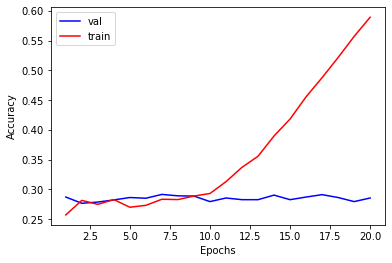

In [23]:
# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe du score de validation du réseau Dense
plt.plot(np.arange(1 , len(acc_dense)+1, 1),
         val_acc_dense,
         label = 'val',
         color = 'blue')

# Courbe du score d'entrainement du réseau Dense
plt.plot(np.arange(1 , len(acc_dense)+1, 1),
         acc_dense,
         label = 'train',
         color = 'red')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()